In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
from datetime import date
import math
import pandas_datareader as web

In [3]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [4]:
data = web.get_data_yahoo('^NSEBANK', start = datetime.datetime(2000, 1, 2), 
                             end = date.today())
data = data[['Adj Close']]
data.columns = ['Price']
data.head()

,Price
Date,
2007-09-17,6897.100098
2007-09-18,7059.649902
2007-09-19,7401.850098
2007-09-20,7390.149902
2007-09-21,7464.500000


In [5]:
print('There are {} number of days in the dataset.'.format(data.shape[0]))

There are 3048 number of days in the dataset.


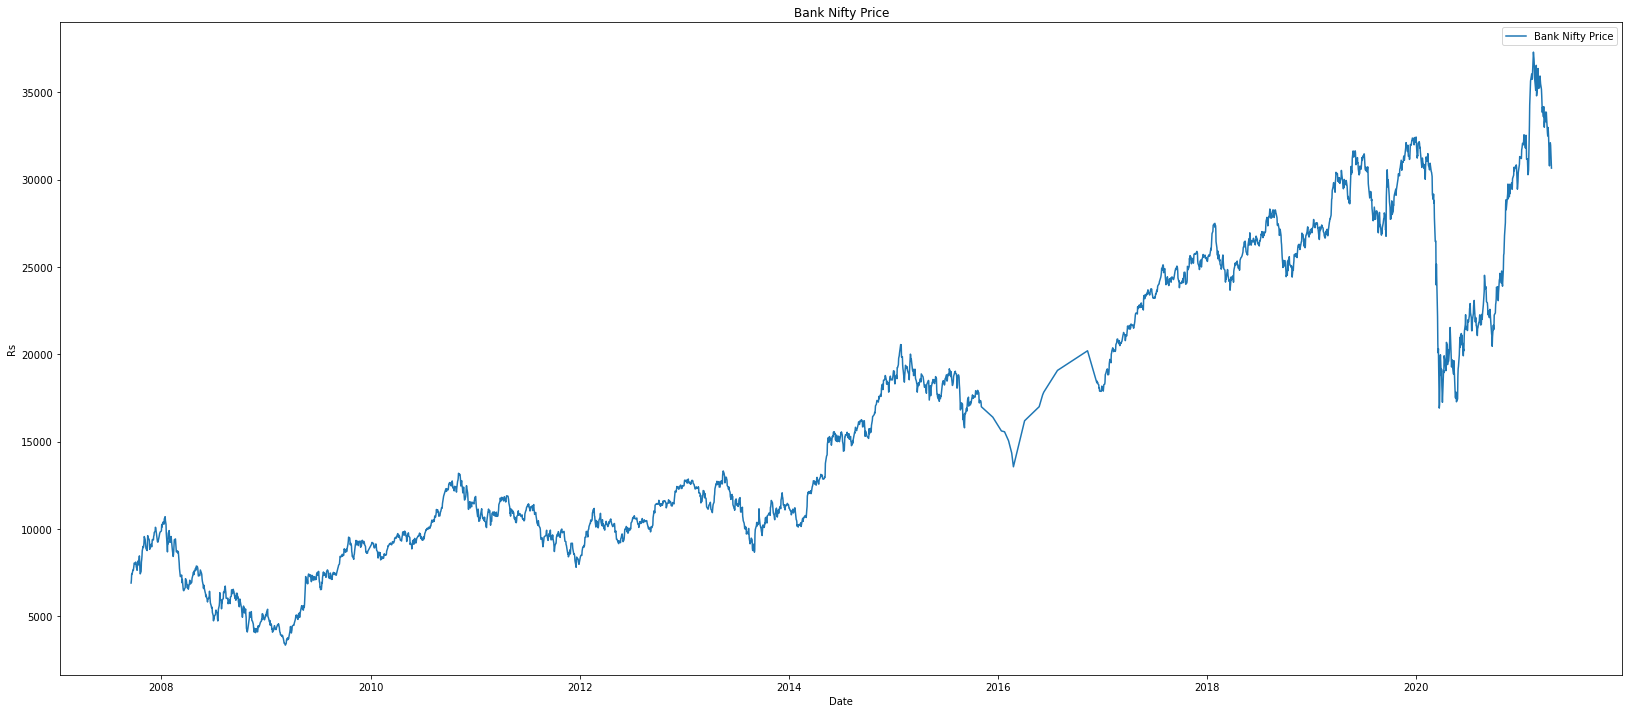

In [6]:
plt.figure(figsize=(28, 12))#, dpi=100)
plt.plot(data.index, data['Price'], label='Bank Nifty Price')
plt.xlabel('Date')
plt.ylabel('Rs')
plt.title('Bank Nifty Price')
plt.legend()
plt.show()

In [7]:
def get_technical_indicators(dataset):
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['Price'].rolling(window=7).mean()
    dataset['ma21'] = dataset['Price'].rolling(window=21).mean()
    
    # Create MACD
    dataset['26ema'] = dataset['Price'].ewm(span=26).mean()
    dataset['12ema'] = dataset['Price'].ewm(span=12).mean()
    dataset['MACD'] = dataset['12ema']-dataset['26ema']

    # Create Bollinger Bands
    dataset['20sd'] = dataset['Price'].rolling(window = 21).std()
    dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
    dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)
    
    # Create Exponential moving average
    dataset['ema'] = dataset['Price'].ewm(com=0.5).mean()
    
    # Create Momentum
    dataset['momentum'] = dataset['Price']-1
    dataset['log_momentum'] = np.log(dataset['momentum'])
    return dataset

In [8]:
df = get_technical_indicators(data)

In [9]:
df = df.dropna()
df.head()

,Price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
Date,,,,,,,,,,,,
2007-10-16,8452.200195,8054.885672,7784.561872,7923.823189,8042.705954,118.882765,386.860908,8558.283689,7010.840056,8363.705360,8451.200195,9.042064
2007-10-17,8099.899902,8122.528530,7841.838053,7939.805749,8051.733831,111.928082,334.378912,8510.595878,7173.080229,8187.835055,8098.899902,8.999484
2007-10-18,7608.750000,8081.514230,7867.985677,7910.249162,7982.088907,71.839745,288.473501,8444.932679,7291.038676,7801.778352,7607.750000,8.936923
2007-10-19,7423.799805,7994.821359,7869.030901,7867.469562,7894.610889,27.141327,286.734632,8442.500165,7295.561638,7549.792654,7422.799805,8.912312
2007-10-22,7568.000000,7910.421387,7877.499953,7841.493689,7843.579502,2.085814,274.237247,8425.974447,7329.025460,7561.930885,7567.000000,8.931552


In [10]:
def plot_technical_indicators(dataset, last_days):
    plt.figure(figsize=(16, 10), dpi=100)
    shape_0 = dataset.shape[0]
    xmacd_ = shape_0-last_days
    
    dataset = dataset.iloc[-last_days:, :]
    x_ = range(3, dataset.shape[0])
    x_ =list(dataset.index)

    plt.figure(figsize=(30,20))
    # Plot first subplot
    plt.subplot(2, 1, 1)
    plt.plot(dataset['ma7'],label='MA 7', color='g',linestyle='--')
    plt.plot(dataset['Price'],label='Closing Price', color='b')
    plt.plot(dataset['ma21'],label='MA 21', color='r',linestyle='--')
    plt.plot(dataset['upper_band'],label='Upper Band', color='c')
    plt.plot(dataset['lower_band'],label='Lower Band', color='c')
    plt.fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.35)
    plt.title('Technical indicators for Goldman Sachs - last {} days.'.format(last_days))
    plt.ylabel('USD')
    plt.legend()

    # Plot second subplot

    plt.subplot(2, 1, 2)
    plt.title('MACD')
    plt.plot(dataset['MACD'],label='MACD', linestyle='-.')
#     plt.hlines(15, xmacd_, shape_0, colors='g', linestyles='--')
#     plt.hlines(-15, xmacd_, shape_0, colors='g', linestyles='--')
    plt.plot(dataset['log_momentum'],label='Momentum', color='b',linestyle='-')

    plt.legend()
    plt.show()

<Figure size 1600x1000 with 0 Axes>

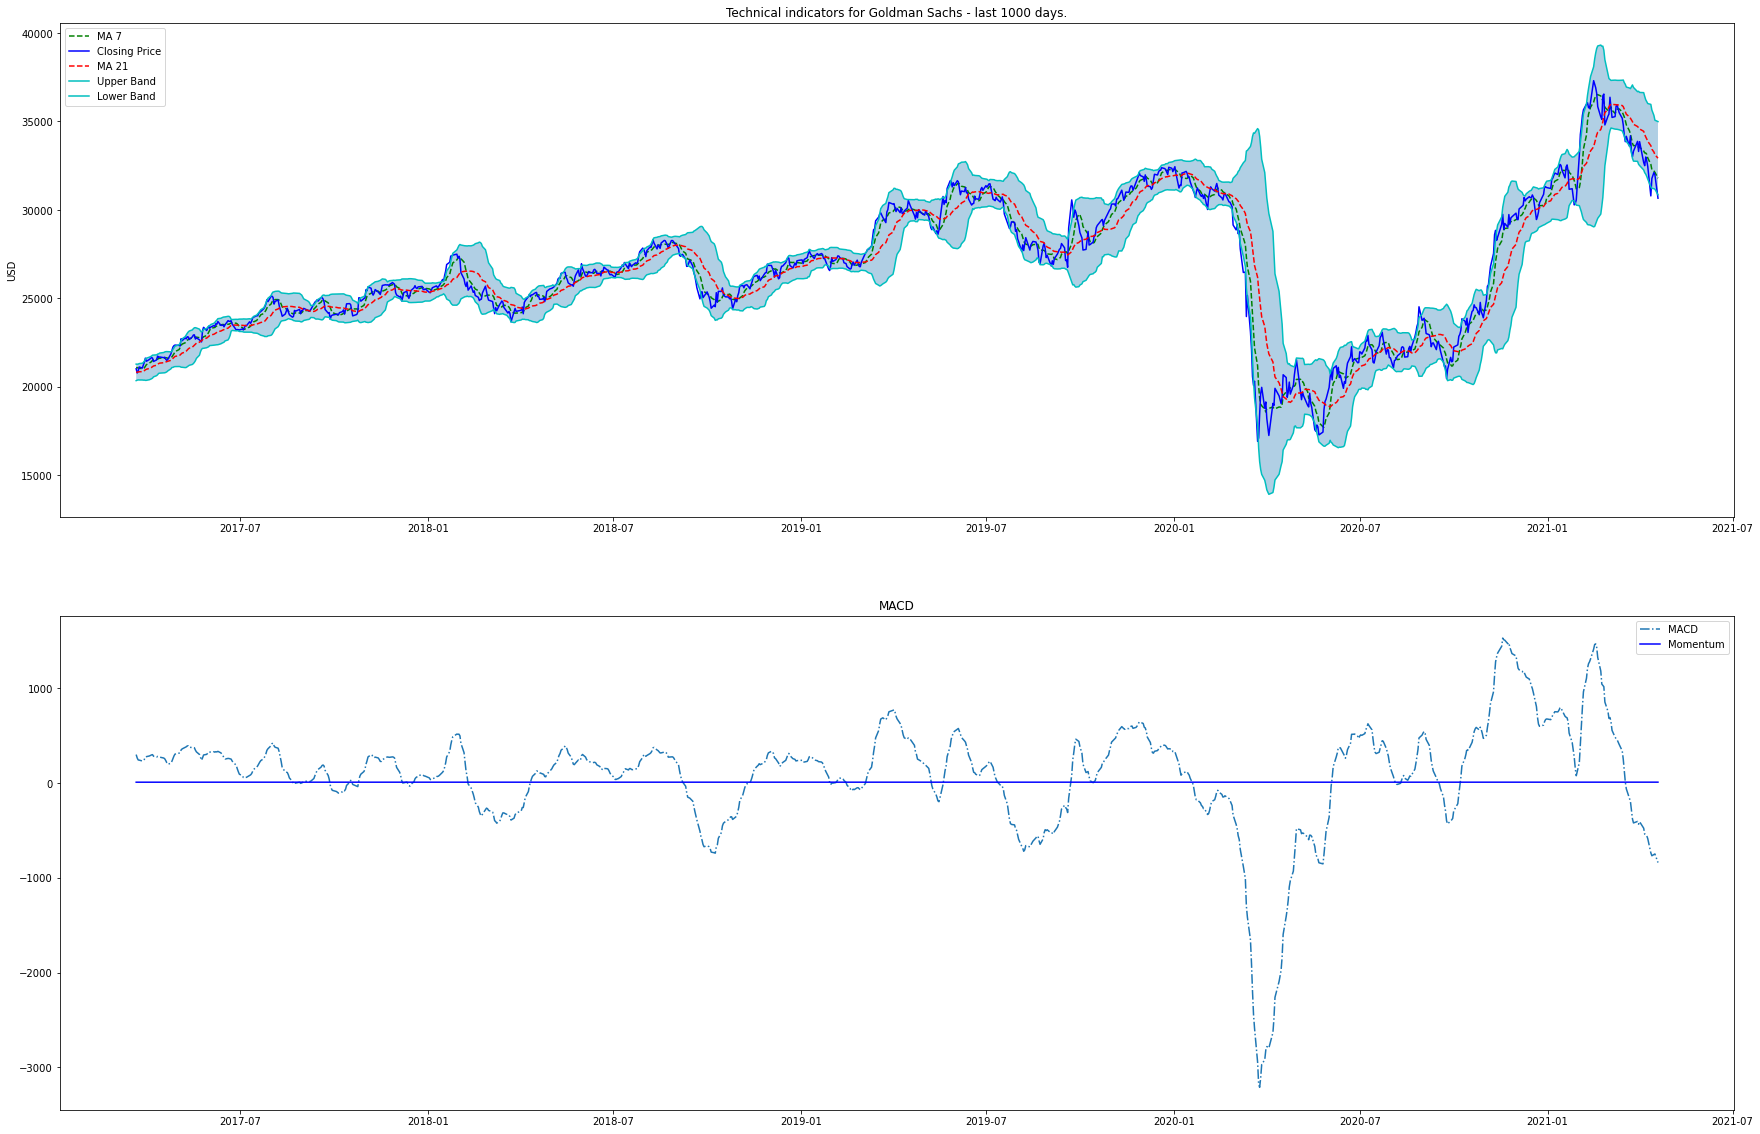

In [11]:
plot_technical_indicators(df, 1000)

Text(0.5, 1.0, 'Params')

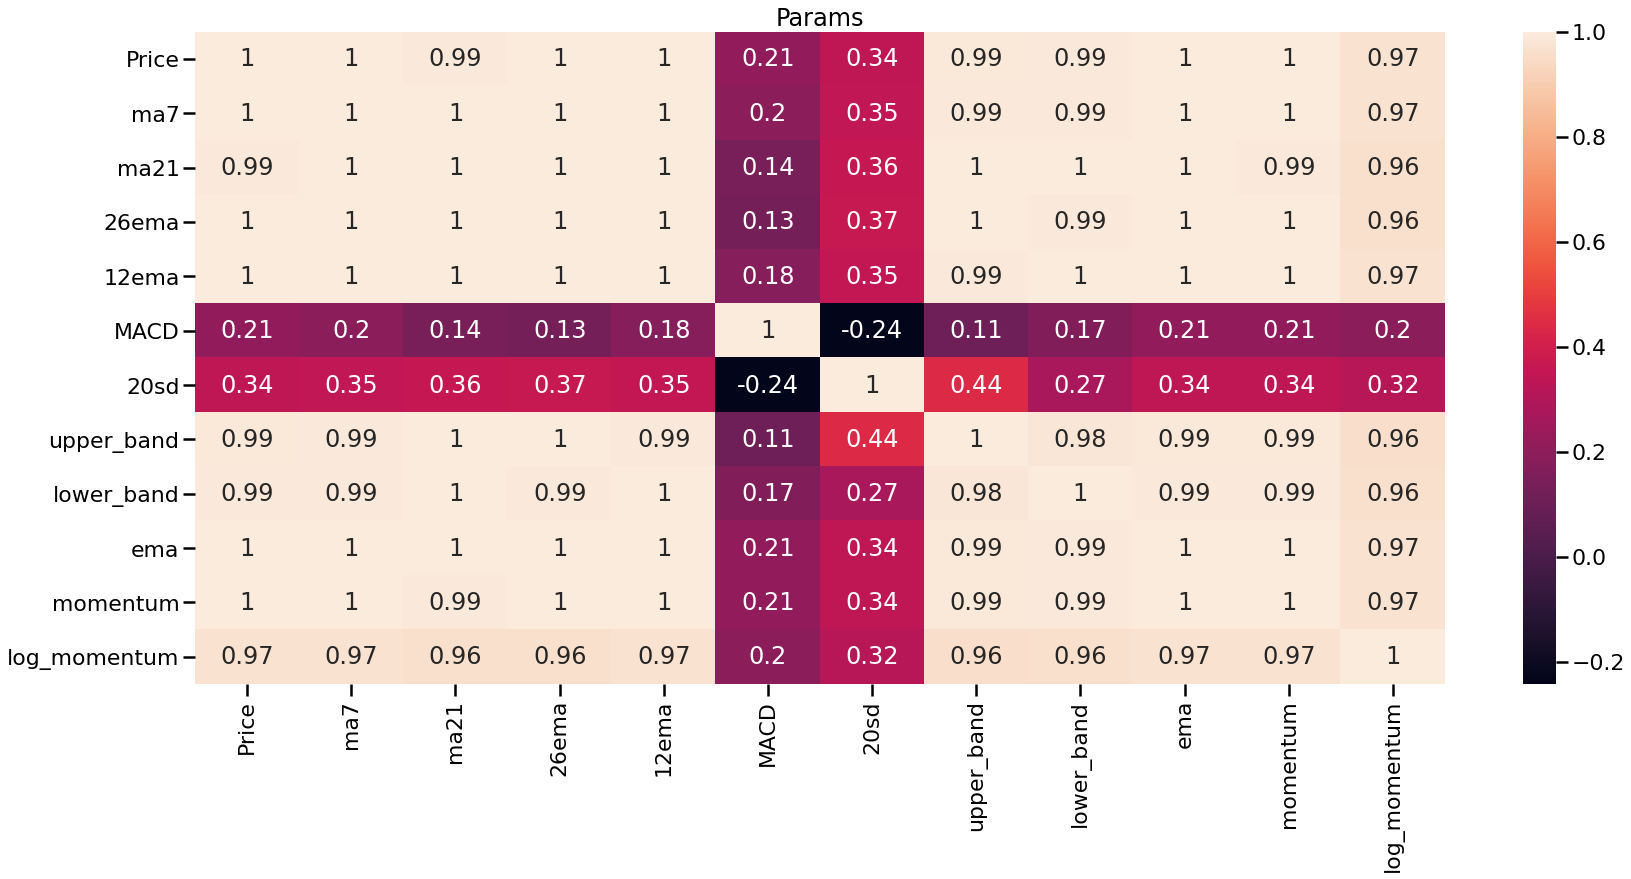

In [12]:
plt.figure(figsize = (28,12))
sns.set_context('poster',font_scale=1)
sns.heatmap(df.corr(), annot = True).set_title('Params')


In [13]:
print('Total dataset has {} samples, and {} features.'.format(df.shape[0], \
                                                              df.shape[1]))

Total dataset has 3028 samples, and 12 features.


In [14]:
df.columns

Index(['Price', 'ma7', 'ma21', '26ema', '12ema', 'MACD', '20sd', 'upper_band',
       'lower_band', 'ema', 'momentum', 'log_momentum'],
      dtype='object')

In [15]:
df

,Price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
Date,,,,,,,,,,,,
2007-10-16,8452.200195,8054.885672,7784.561872,7923.823189,8042.705954,118.882765,386.860908,8558.283689,7010.840056,8363.705360,8451.200195,9.042064
2007-10-17,8099.899902,8122.528530,7841.838053,7939.805749,8051.733831,111.928082,334.378912,8510.595878,7173.080229,8187.835055,8098.899902,8.999484
2007-10-18,7608.750000,8081.514230,7867.985677,7910.249162,7982.088907,71.839745,288.473501,8444.932679,7291.038676,7801.778352,7607.750000,8.936923
2007-10-19,7423.799805,7994.821359,7869.030901,7867.469562,7894.610889,27.141327,286.734632,8442.500165,7295.561638,7549.792654,7422.799805,8.912312
2007-10-22,7568.000000,7910.421387,7877.499953,7841.493689,7843.579502,2.085814,274.237247,8425.974447,7329.025460,7561.930885,7567.000000,8.931552
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-12,30792.000000,32578.900112,33633.657180,33576.115630,32839.894166,-736.221464,1165.697286,35965.051751,31302.262609,31385.037178,30791.000000,10.334978
2021-04-13,31771.599609,32280.842913,33435.242839,33442.447777,32675.541157,-766.906619,1106.936002,35649.114842,31221.370835,31642.745466,31770.599609,10.366297
2021-04-15,32112.849609,32199.985770,33274.109561,33343.959023,32588.973227,-754.985797,1035.862791,35345.835143,31202.383979,31956.148228,32111.849609,10.376980


In [16]:
data_training = df[df.index < '2019-01-31'].copy()
data_training

,Price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
Date,,,,,,,,,,,,
2007-10-16,8452.200195,8054.885672,7784.561872,7923.823189,8042.705954,118.882765,386.860908,8558.283689,7010.840056,8363.705360,8451.200195,9.042064
2007-10-17,8099.899902,8122.528530,7841.838053,7939.805749,8051.733831,111.928082,334.378912,8510.595878,7173.080229,8187.835055,8098.899902,8.999484
2007-10-18,7608.750000,8081.514230,7867.985677,7910.249162,7982.088907,71.839745,288.473501,8444.932679,7291.038676,7801.778352,7607.750000,8.936923
2007-10-19,7423.799805,7994.821359,7869.030901,7867.469562,7894.610889,27.141327,286.734632,8442.500165,7295.561638,7549.792654,7422.799805,8.912312
2007-10-22,7568.000000,7910.421387,7877.499953,7841.493689,7843.579502,2.085814,274.237247,8425.974447,7329.025460,7561.930885,7567.000000,8.931552
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-24,27266.400391,27428.878348,27316.590495,27208.914029,27369.590681,160.676652,220.658590,27757.907674,26875.273315,27288.044037,27265.400391,10.213374
2019-01-25,27115.300781,27376.250000,27322.709542,27201.979714,27330.469158,128.489444,212.693942,27748.097427,26897.321658,27172.881866,27114.300781,10.207817
2019-01-28,26653.050781,27251.150112,27311.971447,27161.318312,27226.250946,64.932634,240.158143,27792.287733,26831.655162,26826.327810,26652.050781,10.190621


In [17]:
data_testing = df[df.index >= '2019-01-31'].copy()
data_testing

,Price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
Date,,,,,,,,,,,,
2019-01-31,27295.449219,26997.121652,27275.504836,27110.884472,27112.816450,1.931977,302.594107,27880.693050,26670.316623,27120.156094,27294.449219,10.214439
2019-02-01,27085.949219,26973.578683,27281.509580,27109.037417,27108.683029,-0.354387,297.220439,27875.950457,26687.068702,27097.351510,27084.949219,10.206733
2019-02-04,27186.599609,26962.178571,27281.109561,27114.782764,27120.670196,5.887431,297.348316,27875.806193,26686.412929,27156.850243,27185.599609,10.210443
2019-02-05,27271.699219,26984.521205,27279.545201,27126.406205,27143.905430,17.499225,297.305238,27874.155677,26684.934725,27233.416227,27270.699219,10.213568
2019-02-06,27402.349609,27091.563895,27274.442801,27146.846457,27183.666073,36.819615,294.063180,27862.569162,26686.316441,27346.038482,27401.349609,10.218348
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-12,30792.000000,32578.900112,33633.657180,33576.115630,32839.894166,-736.221464,1165.697286,35965.051751,31302.262609,31385.037178,30791.000000,10.334978
2021-04-13,31771.599609,32280.842913,33435.242839,33442.447777,32675.541157,-766.906619,1106.936002,35649.114842,31221.370835,31642.745466,31770.599609,10.366297
2021-04-15,32112.849609,32199.985770,33274.109561,33343.959023,32588.973227,-754.985797,1035.862791,35345.835143,31202.383979,31956.148228,32111.849609,10.376980


In [18]:
scalar = MinMaxScaler()

data_training_scaled = scalar.fit_transform(data_training)
print(data_training_scaled.shape)
data_training_scaled

(2488, 12)


array([[0.20466128, 0.1844814 , 0.16702761, ..., 0.20037062, 0.20466128,
        0.4344004 ],
       [0.19055816, 0.18722454, 0.16938591, ..., 0.19329457, 0.19055816,
        0.41448403],
       [0.17089667, 0.18556128, 0.17046251, ..., 0.17776178, 0.17089667,
        0.38522201],
       ...,
       [0.93326945, 0.96295368, 0.97105193, ..., 0.94320445, 0.93326945,
        0.97162384],
       [0.93008092, 0.95783644, 0.96996994, ..., 0.93642018, 0.93008092,
        0.9702239 ],
       [0.94017286, 0.95373418, 0.9693137 , ..., 0.94092082, 0.94017286,
        0.97464053]])

In [19]:
X_train = []
y_train = []

In [20]:
for i in range(60, data_training.shape[0]):
    X_train.append(data_training_scaled[i-60: i])
    y_train.append(data_training_scaled[i, 0])

In [21]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape, y_train.shape

((2428, 60, 12), (2428,))

In [22]:
regressor = Sequential()

regressor.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 12)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.5))

regressor.add(Dense(units = 1))

In [23]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            12600     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [24]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [55]:
regressor.fit(X_train, y_train, epochs=50, batch_size = 64)

Epoch 1/50
38/38 [==============================] - 4s 112ms/step - loss: 0.0020
Epoch 2/50
38/38 [==============================] - 5s 128ms/step - loss: 0.0020
Epoch 3/50
38/38 [==============================] - 5s 132ms/step - loss: 0.0019
Epoch 4/50
38/38 [==============================] - 5s 129ms/step - loss: 0.0021
Epoch 5/50
38/38 [==============================] - 4s 115ms/step - loss: 0.0021
Epoch 6/50
38/38 [==============================] - 5s 128ms/step - loss: 0.0020
Epoch 7/50
38/38 [==============================] - 5s 132ms/step - loss: 0.0019
Epoch 8/50
38/38 [==============================] - 5s 133ms/step - loss: 0.0020
Epoch 9/50
38/38 [==============================] - 4s 117ms/step - loss: 0.0020
Epoch 10/50
38/38 [==============================] - 5s 128ms/step - loss: 0.0022
Epoch 11/50
38/38 [==============================] - 5s 133ms/step - loss: 0.0019
Epoch 12/50
38/38 [==============================] - 5s 134ms/step - loss: 0.0021
Epoch 13/50
38/38 [======

In [38]:
past_60 = data_training.tail(60)

dt = past_60.append(data_testing, ignore_index = True)
dt

,Price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
0,25701.650391,25026.357143,25022.004650,25326.998865,25143.138786,-183.860079,359.706114,25741.416878,24302.592422,25544.229261,25700.650391,10.154272
1,25732.199219,25157.035714,25065.476004,25357.013706,25233.763468,-123.250238,388.031719,25841.539443,24289.412566,25669.542566,25731.199219,10.155460
2,25598.000000,25325.171317,25120.454613,25374.864543,25289.799858,-85.064685,377.131356,25874.717325,24366.191901,25621.847522,25597.000000,10.150230
3,25737.500000,25436.285714,25173.747489,25401.726429,25358.676803,-43.049626,381.677483,25937.102455,24410.392522,25698.949174,25736.500000,10.155665
4,25771.000000,25573.892857,25232.954613,25429.080027,25422.111141,-6.968886,372.773924,25978.502462,24487.406765,25746.983058,25770.000000,10.156966
...,...,...,...,...,...,...,...,...,...,...,...,...
595,30792.000000,32578.900112,33633.657180,33576.115630,32839.894166,-736.221464,1165.697286,35965.051751,31302.262609,31385.037178,30791.000000,10.334978
596,31771.599609,32280.842913,33435.242839,33442.447777,32675.541157,-766.906619,1106.936002,35649.114842,31221.370835,31642.745466,31770.599609,10.366297
597,32112.849609,32199.985770,33274.109561,33343.959023,32588.973227,-754.985797,1035.862791,35345.835143,31202.383979,31956.148228,32111.849609,10.376980
598,31977.449219,32125.142857,33121.485677,33242.736075,32494.892610,-747.843465,974.942038,35071.369753,31171.601601,31970.348889,31976.449219,10.372755


In [48]:
inputs = scalar.fit_transform(dt)
print(inputs.shape)
inputs

(600, 12)


array([[0.430829  , 0.38862474, 0.36025362, ..., 0.4142078 , 0.430829  ,
        0.52883036],
       [0.43232733, 0.39557886, 0.36279251, ..., 0.4206031 , 0.43232733,
        0.53033249],
       [0.42574526, 0.40452628, 0.36600347, ..., 0.41816901, 0.42574526,
        0.5237204 ],
       ...,
       [0.7452792 , 0.77037289, 0.84220762, ..., 0.74143679, 0.7452792 ,
        0.81044235],
       [0.73863822, 0.76639009, 0.83329381, ..., 0.74216151, 0.73863822,
        0.80509934],
       [0.67411935, 0.74868302, 0.82177269, ..., 0.69764757, 0.67411935,
        0.75198062]])

In [49]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])
    
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((540, 60, 12), (540,))

In [73]:
y_pred = regressor.predict(X_test)

In [74]:
y_pred

array([[0.44019115],
       [0.43960565],
       [0.43967968],
       [0.44024923],
       [0.44109863],
       [0.44210738],
       [0.44311458],
       [0.44385427],
       [0.44418478],
       [0.44398725],
       [0.44340548],
       [0.44262937],
       [0.44173878],
       [0.44082904],
       [0.4401071 ],
       [0.43992472],
       [0.44006026],
       [0.4404825 ],
       [0.44087356],
       [0.440899  ],
       [0.44056562],
       [0.4402246 ],
       [0.4406362 ],
       [0.44258934],
       [0.44551948],
       [0.44820935],
       [0.45034808],
       [0.45298213],
       [0.4574455 ],
       [0.46295524],
       [0.46942303],
       [0.47625786],
       [0.48257607],
       [0.48718238],
       [0.48875043],
       [0.48804885],
       [0.4871694 ],
       [0.48929307],
       [0.49559388],
       [0.50337815],
       [0.50926334],
       [0.51130986],
       [0.5108372 ],
       [0.50963527],
       [0.5085489 ],
       [0.5086066 ],
       [0.509339  ],
       [0.510

In [75]:
scale = 1/scalar.scale_[0]

In [76]:
y_pred = y_pred*scale
y_test = y_test*scale

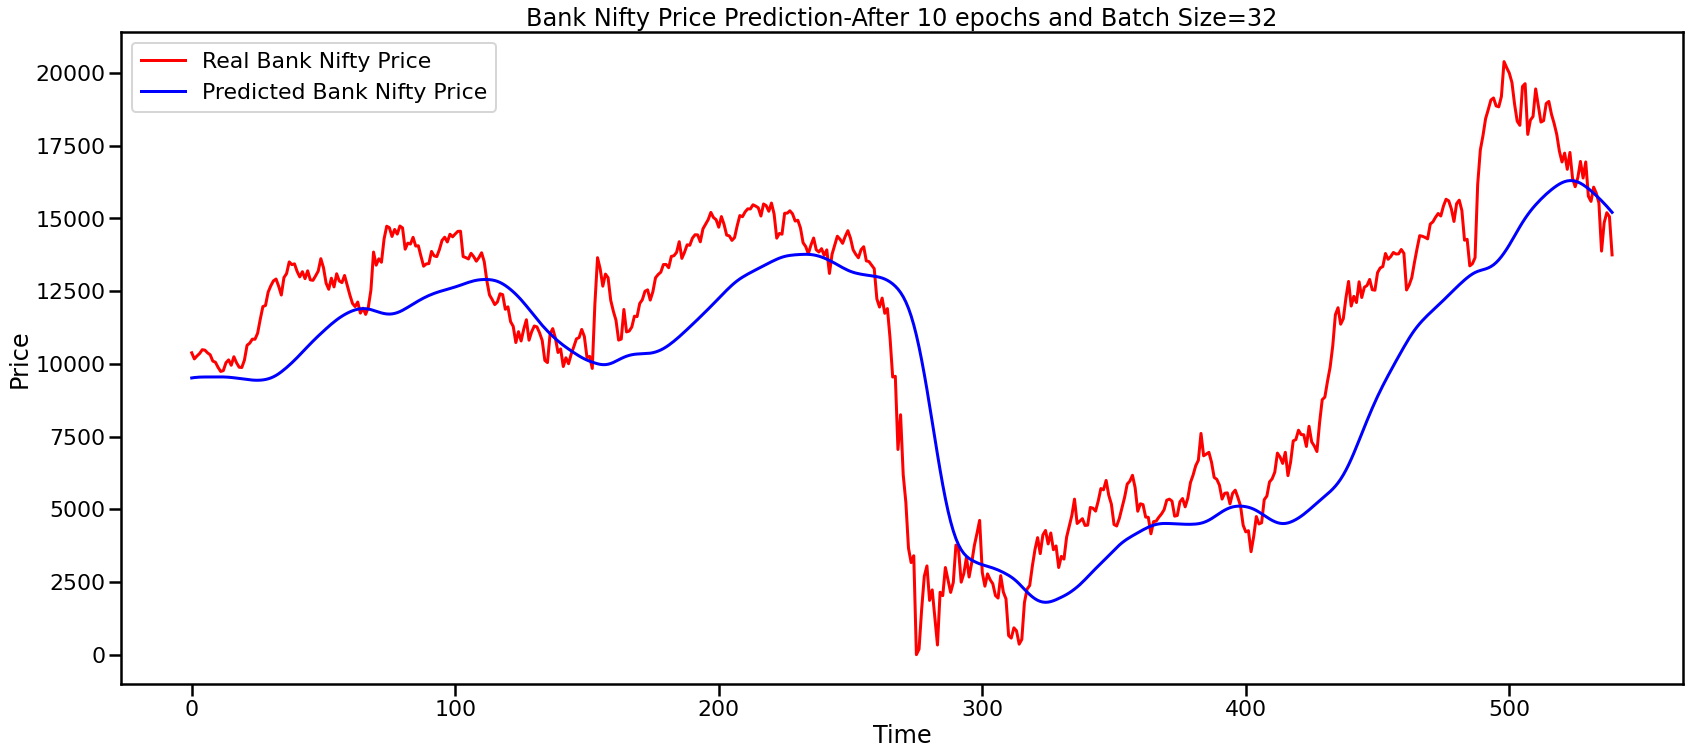

In [35]:
# Visualising the results
plt.figure(figsize=(28,12))
plt.plot(y_test, color = 'red', label = 'Real Bank Nifty Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Bank Nifty Price')
plt.title('Bank Nifty Price Prediction-After 10 epochs and Batch Size=32')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

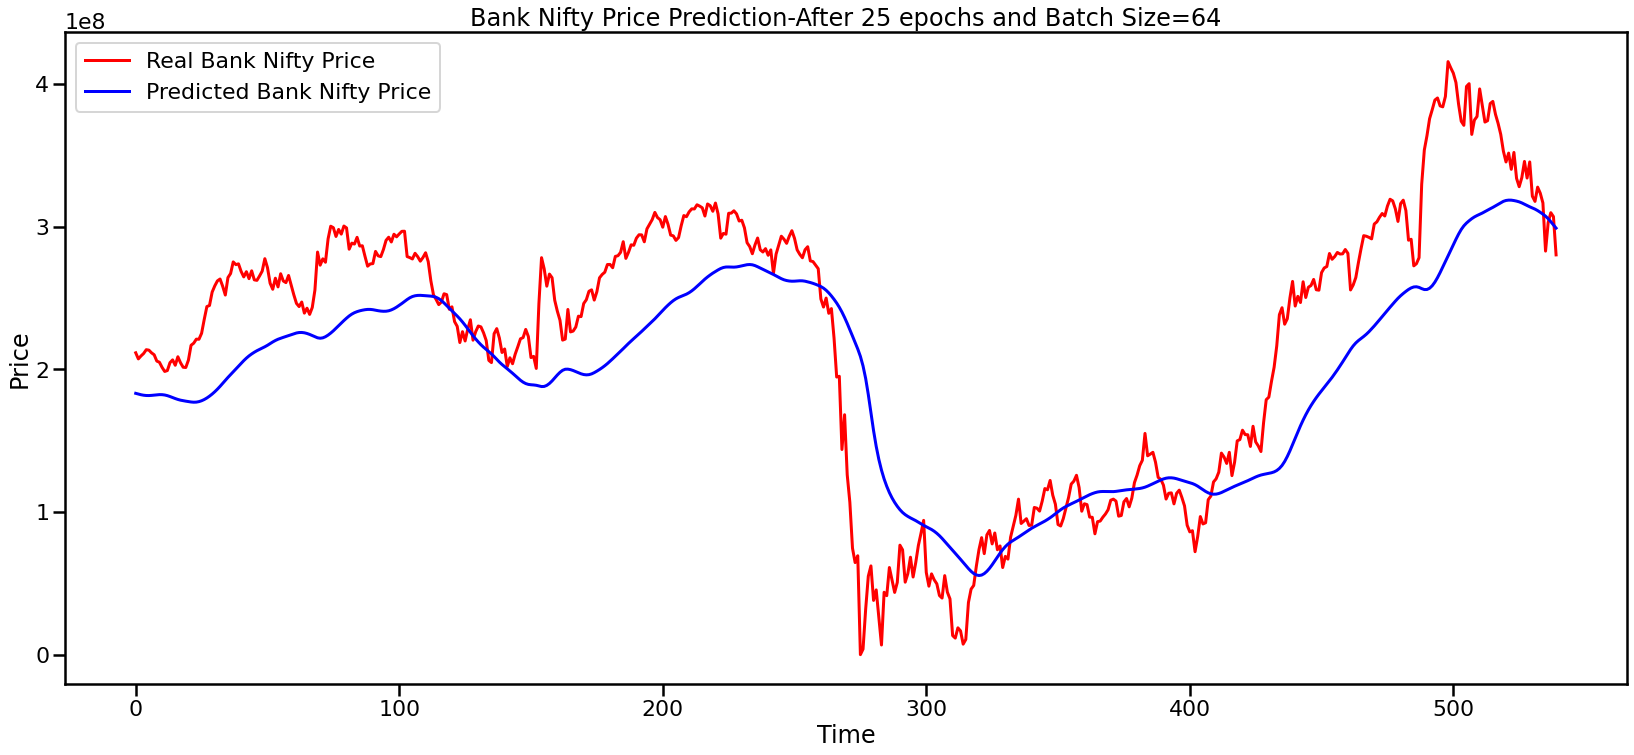

In [46]:
# Visualising the results
plt.figure(figsize=(28,12))
plt.plot(y_test, color = 'red', label = 'Real Bank Nifty Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Bank Nifty Price')
plt.title('Bank Nifty Price Prediction-After 25 epochs and Batch Size=64')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

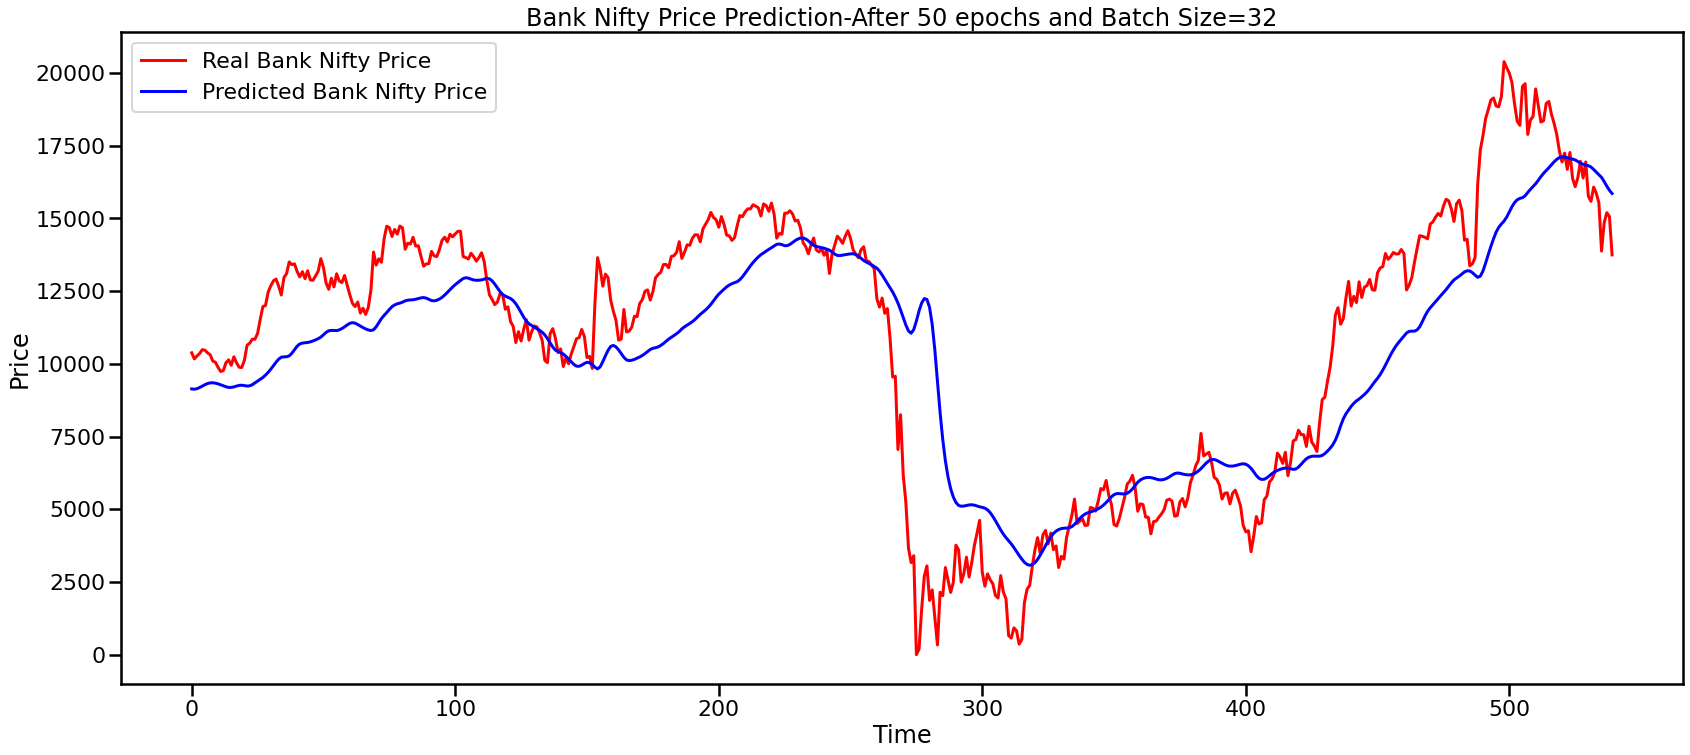

In [54]:
# Visualising the results
plt.figure(figsize=(28,12))
plt.plot(y_test, color = 'red', label = 'Real Bank Nifty Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Bank Nifty Price')
plt.title('Bank Nifty Price Prediction-After 50 epochs and Batch Size=32')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()